In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['ID', 'diagnosis', "mean_radius",
    "mean_texture",
    "mean_perimeter",
    "mean_area",
    "mean_smoothness",
    "mean_compactness",
    "mean_concavity",
    "mean_concave_points",
    "mean_symmetry",
    "mean_fractal_dimension",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave_points_se",
    "symmetry_se",
    "fractal_dimension_se",
    "worst_radius",
    "worst_texture",
    "worst_perimeter",
    "worst_area",
    "worst_smoothness",
    "worst_compactness",
    "worst_concavity",
    "worst_concave_points",
    "worst_symmetry",
    "worst_fractal_dimension"]

df = pd.read_csv('wdbc_data.csv', names= cols)
df.head()

,ID,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
diagnosis = []
for i in df['diagnosis']:
    if i == "M":
        x = 1
    elif i == "B":
        x = -1
    diagnosis.append(x)

In [4]:
df['diagnosis'] = diagnosis
df['diagnosis'].unique()

array([ 1, -1], dtype=int64)

In [5]:
cols = ['diagnosis', 'ID']
x = df.drop(cols, axis= 1)
y = df['diagnosis']

In [6]:
# scaling
for i in x.columns:
    x[i] = (x[i] - min(x[i])) / (max(x[i]) - min(x[i]))

In [7]:
count = 0
for i in y:
    if i == 1:
        count += 1
    else:
        continue
print(f"Number of M = {count}")
print(f"Number of M = {y.shape[0]-count}")

Number of M = 212
Number of M = 357


In [8]:
# Since the number of samples is small, we will need to use Over Sampling to balance the number of each class
ros = RandomOverSampler()
x, y = ros.fit_resample(x,y)

In [9]:
# Let's recheck the number of each class
count = 0
for i in y:
    if i == 1:
        count += 1
    else:
        continue
print(f"Number of M = {count}")
print(f"Number of M = {y.shape[0]-count}")

Number of M = 357
Number of M = 357


In [10]:
x = x.to_numpy()
y = y.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 101, test_size= 0.2)

In [11]:
def accuracy(y_pred, y_test):
    q = 0
    n = len(y_test)
    for i in range(len(y_pred)):
        if y_pred[i] == y_test[i]:
            q += 1
    return (q/n)*100

In [ ]:
trial = []
glob_min_search = []
glob_W_search = []
glob_b_search = []

for i in range(25):
    svm = SVC(kernel= 'rbf', C= 1.0)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    acc = accuracy(y_pred, y_test)

    trial.append(i)
    glob_min_search.append(acc)

In [28]:
print("Best accuracy for soft margin svm", round(max(glob_min_search), 2), "%")

Best accuracy for soft margin svm 96.5 %


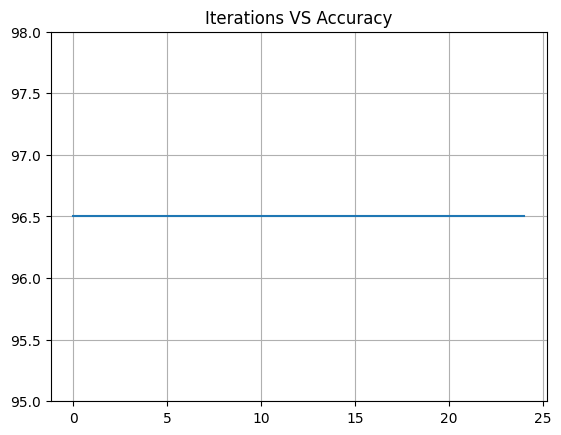

In [25]:
plt.plot(trial, glob_min_search)
plt.ylim(95, 98)
plt.title("Iterations VS Accuracy")
plt.grid()
plt.show()